# Buổi 10: Trực quan hóa & kể chuyện dữ liệu
- Giới thiệu thư viện: matplotlib
- Các kiểu trực quan hóa dữ liệu: line chart, Pie, Bar, Histogram, Scatterplot, Boxplot
- Kể chuyện bằng dữ liệu
- Mini project: Trực quan hóa - kể câu chuyện dữ liệu

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./spotify.csv")
# df.head()


## Kiểm tra kiểu dữ liệu của các cột
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      366 non-null    object 
 1   Shape of You              366 non-null    int64  
 2   Despacito                 359 non-null    float64
 3   Something Just Like This  319 non-null    float64
 4   HUMBLE.                   282 non-null    float64
 5   Unforgettable             275 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.3+ KB


In [3]:
### Đổi kiểu dữ liệu cột Date object => datetime64
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.dtypes


# ### Tất cả ô NaN => 0
# df[['Despacito', 'Something Just Like This', 'HUMBLE.', 'Unforgettable']].fillna(0)

# # ### Đổi kiểu dữ liệu từ float => in sử dụng gì:
# df[['Despacito', 'Something Just Like This', 'HUMBLE.', 'Unforgettable']] = df[['Despacito', 'Something Just Like This', 'HUMBLE.', 'Unforgettable']].astype('Int64') 
# # df['Despacito'] = df['Despacito'].astype("Int64")

# df.dtypes

Date                        datetime64[ns]
Shape of You                         int64
Despacito                          float64
Something Just Like This           float64
HUMBLE.                            float64
Unforgettable                      float64
dtype: object

### Kiểm tra trùng lặp

In [4]:
df.duplicated().sum()

np.int64(0)

## Sử dụng biểu đồ đường để biểu diễn dữ liệu

<Axes: xlabel='Date'>

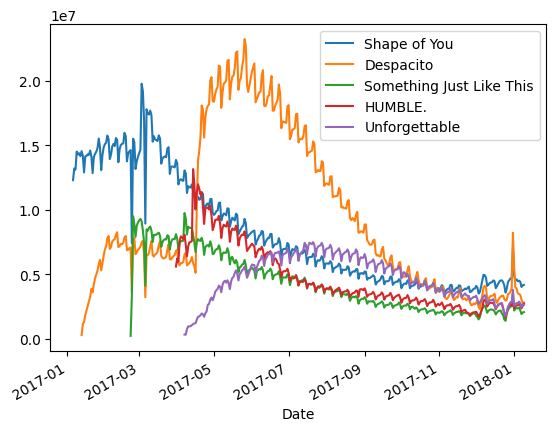

In [5]:
df.plot.line(x="Date")

### Sử dụng plot để vẽ biểu đồ

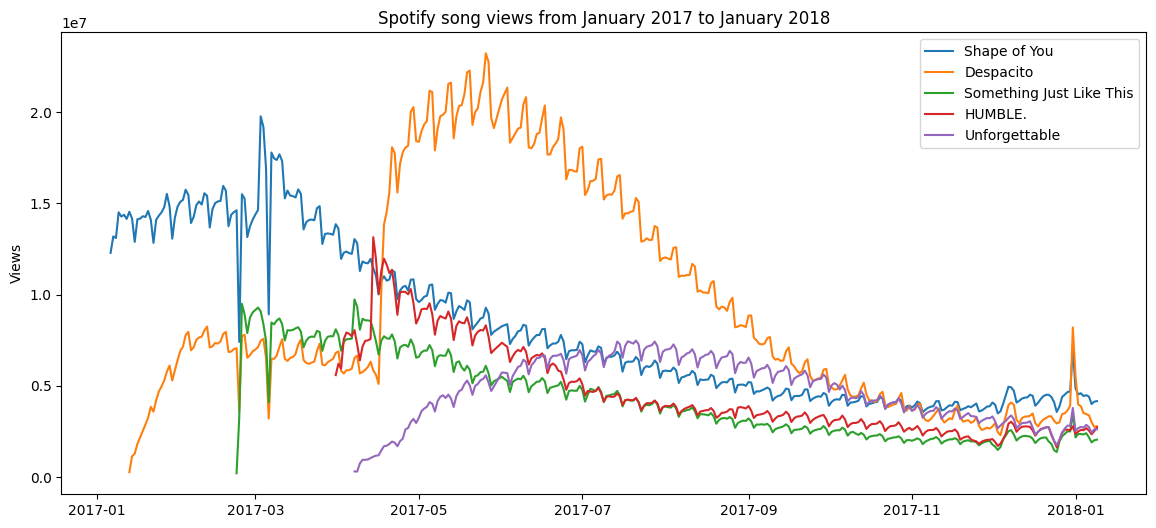

In [6]:
plt.figure(figsize=(14, 6))
df_line = df.set_index("Date") 

plt.plot(df_line) # vẽ biểu đồ đường

plt.legend(df_line.columns)
plt.ylabel("Views")
plt.title("Spotify song views from January 2017 to January 2018")
plt.show() ## Hiển thị


### Biểu diễn kết quả phân tích top 10 tổng tài sản theo lĩnh vực

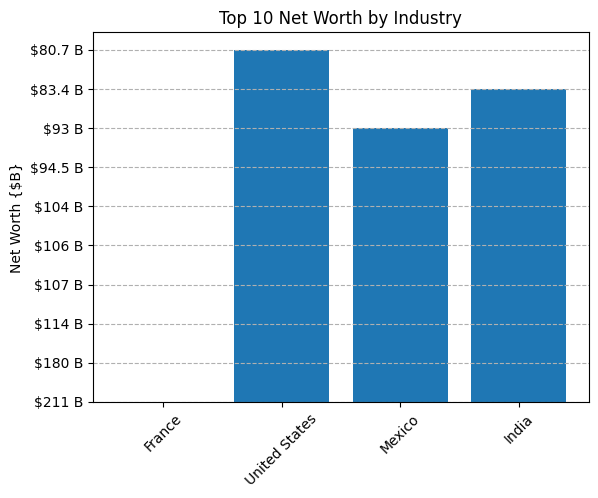

In [ ]:
df_topindustry = pd.read_csv('../SS9/Billionaires.csv', index_col=[0])
# df_topindustry.info() # lấy thông tin dữ liệu


df_topindustry = df_topindustry[:10]

## SỬ DỤNG BIỂU ĐỒ CỘT ĐỂ BIỂU Diễn
plt.bar(x=df_topindustry["Country | Territory"], height=df_topindustry['Net Worth'])

plt.xticks(rotation=45)
plt.ylabel("Net Worth {$B}")
plt.title("Top 10 Net Worth by Industry")
# plt.grid(axis="y", linestyle="--")
plt.show()

## Số lượng tỷ phú lớn nhất: Hoa Kỳ


### Biểu diễn phân phối tuổi của các tỷ phú 

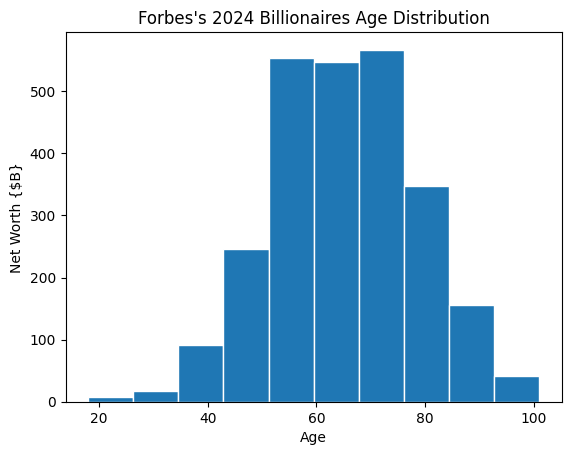

In [ ]:
df_topindustry = pd.read_csv('../SS9/Billionaires.csv', index_col=[0]) ## đọc lại toàn bộ file

plt.hist( ## Biểu diễn phân bổ của một biến số lượng bằng cách chia dữ liệu thành các khoảng (bins) và đếm số lượng phần tử rơi vào từng khoảng đó
    x=df_topindustry['Age'],
    bins=20,
    edgecolor='white'
)

plt.title("Forbes's 2024 Billionaires Age Distribution")
plt.ylabel("Net Worth {$B}")
plt.xlabel("Age")
plt.show()

### Mối quan hệ giữa phân phối tuổi và phân phối tài sản của các tỷ phú

Biểu đồ phân tán (Scatter): phân phối sử dụng các điểm dữ liệu (point) để biểu diễn mối quan hệ mạnh-yếu giữa các biến số
Khi xem xét biểu đồ phân tán, cần xét: 
- Điểm dữ liệu tụ hay tán ra
- Phân phối dương hay âm (trái - phải)

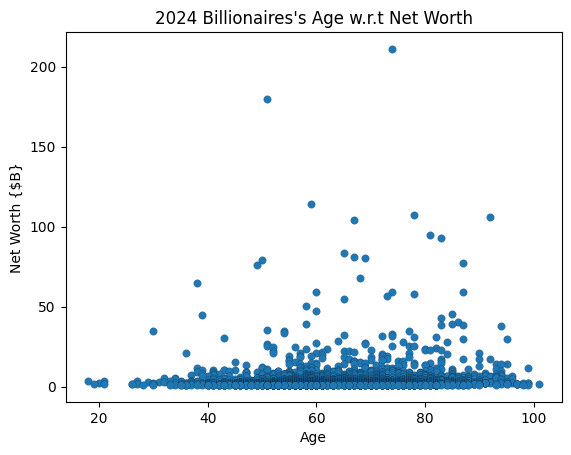

In [ ]:
df_topindustry = pd.read_csv('../SS9/Billionaires.csv', index_col=[0]) ## đọc lại toàn bộ file


# Làm sạch cột Net Worth: loại bỏ ký tự $ và B, sau đó chuyển về float
df_topindustry['Net Worth'] = (
    df_topindustry['Net Worth']
    .str.replace('$', '', regex=False) # hiểu $ là ký tự thường, không phải ký hiệu đặc biệt trong biểu thức chính quy
    .str.replace(' B', '', regex=False)
    .astype(float)
)


plt.scatter(
    x=df_topindustry['Age'],
    y=df_topindustry['Net Worth'],
    s=30,
    linewidths=0.1,
    edgecolors="black"
)

plt.title("2024 Billionaires's Age w.r.t Net Worth")
plt.ylabel("Net Worth {$B}")
plt.xlabel("Age")
plt.show()





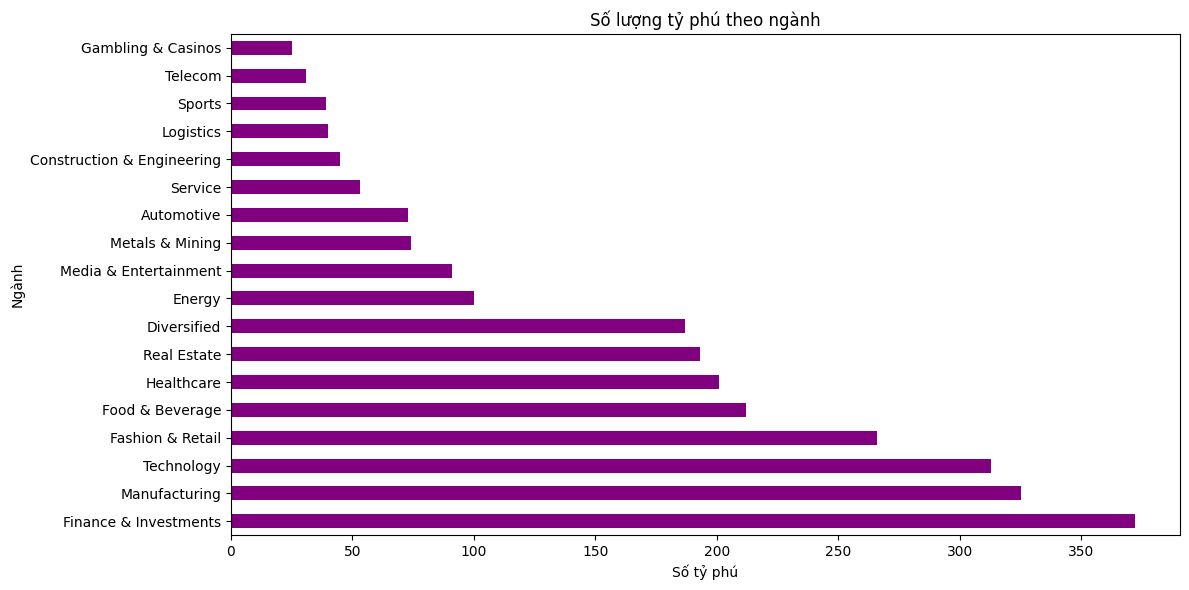

In [57]:
## Số tỷ phú theo ngành 
df_topindustry = pd.read_csv('../SS9/Billionaires.csv', index_col=[0]) ## đọc lại toàn bộ file
industry_count = df_topindustry["Industry"].value_counts()

plt.figure(figsize=(12, 6))
industry_count.plot(kind="barh", color="purple")
plt.title("Số lượng tỷ phú theo ngành")
plt.xlabel("Số tỷ phú")
plt.ylabel("Ngành")
plt.tight_layout()
plt.show()

Thống kê:
- Hoa Kỳ dẫn đầu với số lượng tỷ phú vượt trội, tiếp theo là Trung Quốc, Ấn Độ và Đức.
- Phần lớn tỷ phú nằm trong độ tuổi từ 60–80 tuổi, cho thấy sự tích lũy tài sản cần thời gian dài.
- Mối quan hệ giữa tuổi và tài sản: Không có mối tương quan tuyến tính rõ ràng. Có tỷ phú trẻ rất giàu (Mark Zuckerberg, 38 tuổi – 64.4 tỷ USD), nhưng đa số tài sản lớn tích lũy ở tuổi > 60.
- Số tỷ phú theo ngành: 